In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import palette, models_order, assignments_order

In [3]:
dataset = "restaurants"
# dataset = "nips"
# dataset = "drugs"

In [37]:
df = pd.read_csv(f'../results/{dataset}_results_auc_init.csv', index_col=0)

# filter SBM and DSBM models
df = df[df['model'].isin(['SBM', 'DSBM'])]

# filter assignment soft
df = df[df['assignment'] == 'soft']

df.head()

,auc,prauc,model,assignment,k,iteration,init
1,0.827828,0.023879,SBM,soft,2,0,True
2,0.836135,0.034799,SBM,soft,2,0,False
4,0.833719,0.027307,DSBM,soft,2,0,True
5,0.834071,0.027494,DSBM,soft,2,0,False
13,0.836366,0.027323,SBM,soft,3,0,True


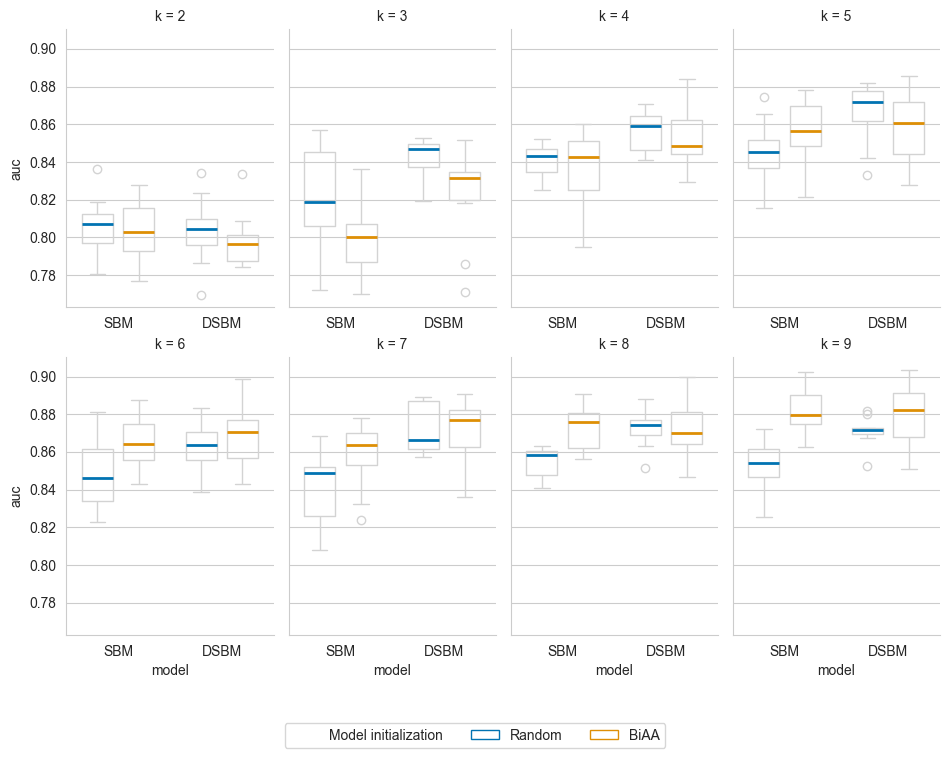

In [91]:
box_props = dict(
    color = 'lightgray',
    linewidth = 1,
)

g = sns.FacetGrid(df, col="k", col_wrap=4, sharex=False, height=4, aspect=.6)
g.map_dataframe(
    sns.boxplot,
    x='model',
    y='auc',
    hue='init',
    palette='colorblind',
    dodge=True,
    fill=False,
    gap=.25,
    boxprops=box_props,
    whiskerprops=box_props,
    capprops=box_props,
    medianprops=dict(
        linewidth=box_props['linewidth'] * 2,
    ),
    flierprops=dict(markeredgecolor=box_props['color'], markeredgewidth=box_props['linewidth']),
)

# get the legend
handles, labels = g.axes.flatten()[-1].get_legend_handles_labels()

# rename labels
labels = ['BiAA' if l_i == 'True' else 'Random' for l_i in labels]

# Add an empty plot to the legend
handles.insert(0, plt.Line2D([0], [0], marker='None', linestyle='None', color='None'))
labels.insert(0, 'Model initialization')

# adjust the subplots to make room for the legend
g.fig.subplots_adjust(bottom=0.2)

# plot the legend lower, center of the whole figure
g.fig.legend(handles, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(.5, .05))

# save figure
g.fig.savefig(f'../figures/{dataset}_boxplot_init.pdf', dpi=300)

plt.show()

In [102]:
df = pd.read_csv(f'../results/{dataset}_results_loss_init.csv', index_col=0)

# filter SBM and DSBM models
df = df[df['model'].isin(['SBM', 'DSBM'])]

# filter assignment soft
df = df[df['assignment'] == 'soft']

# filter each 100 steps
df = df[df['step'] % 200 == 0]

df = df.groupby(['k', 'model', 'assignment', 'step', 'init']).mean().reset_index()

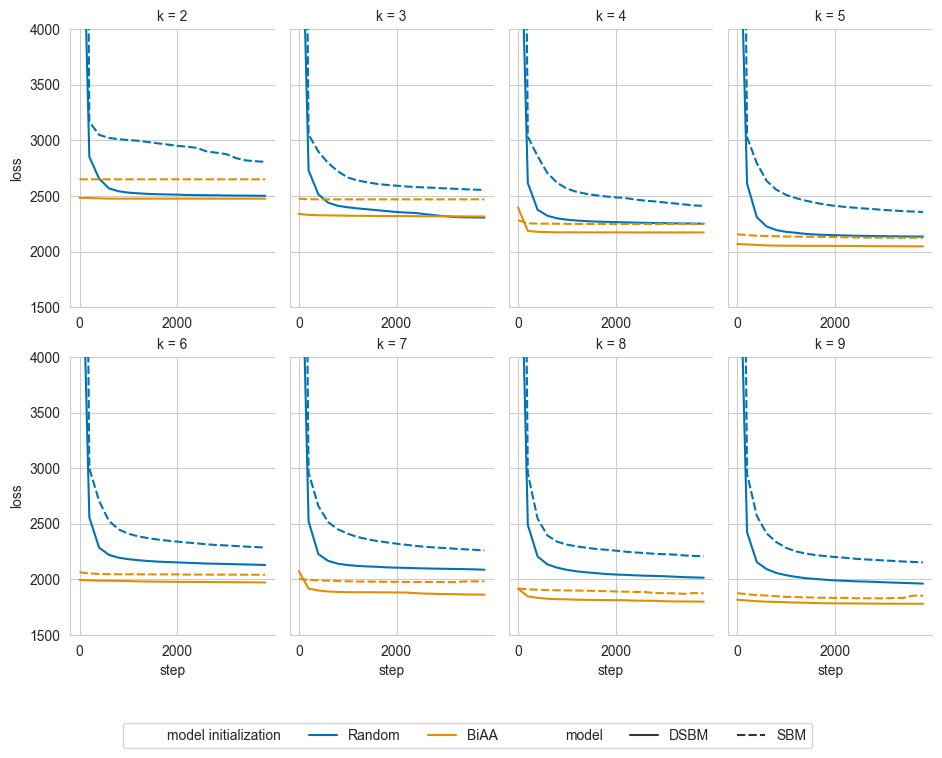

In [107]:
g = sns.FacetGrid(df, col="k", col_wrap=4, palette=palette[:4], sharex=False, height=4, aspect=.6)
g.map_dataframe(
        sns.lineplot,
            x='step',
            y='loss',
            hue='init',
            style='model',
            palette="colorblind",
        )

# cut limits
g.set(ylim=(1500, 4000))

# get the legend
handles, labels = g.axes.flatten()[-1].get_legend_handles_labels()

# rename labels

labels = ['BiAA' if l_i == 'True' else l_i for l_i in labels]
labels = ['Random' if l_i == 'False' else l_i for l_i in labels]
labels = ['model initialization' if l_i == 'init' else l_i for l_i in labels]


# adjust the subplots to make room for the legend
g.fig.subplots_adjust(bottom=0.2)

# plot the legend lower, center of the whole figure
g.fig.legend(handles, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(.5, .05))

# save figure fig
g.fig.savefig(f'../figures/{dataset}_loss_init.pdf', dpi=300)

plt.show()